# Components of StyleGAN

### Goals
In this notebook, you're going to implement various components of StyleGAN, including the truncation trick, the mapping layer, noise injection, adaptive instance normalization (AdaIN), and progressive growing. 

### Learning Objectives

1.   Understand the components of StyleGAN that differ from the traditional GAN.
2.   Implement the components of StyleGAN.

## Getting Started
You will begin by importing some packages from PyTorch and defining a visualization function which will be useful later.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import TensorBoardLogger

import gans
from gans import get_truncated_noise, styleGAN

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def show_tensor_images(image_tensor, num_images=16, size=(3, 64, 64), nrow=3):
    '''
    Function for visualizing images: Given a tensor of images, number of images,
    size per image, and images per row, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu().clamp_(0, 1)
    image_grid = make_grid(image_unflat[:num_images], nrow=nrow, padding=0)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.axis('off')
    plt.show()

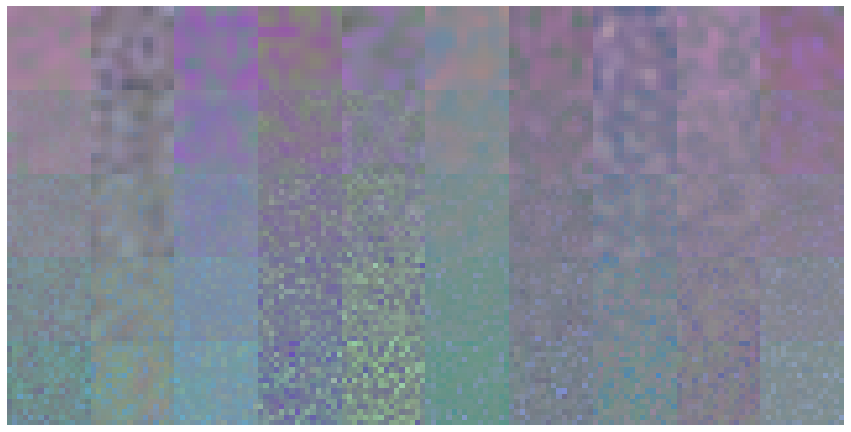

In [3]:
import numpy as np
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

viz_samples = 10
truncation = 0.7
test_samples = 10
z_dim = 128

mu_stylegan = styleGAN().styleGAN

# The noise is exaggerated for visual effect
viz_noise = get_truncated_noise(viz_samples, z_dim, truncation) * 10

images = []
for alpha in np.linspace(0, 1, num=5):
    mu_stylegan.alpha = alpha
    viz_result =  mu_stylegan(viz_noise)
    images += [tensor for tensor in viz_result]
show_tensor_images(torch.stack(images), nrow=viz_samples, num_images=len(images))